In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Dropout
import tensorflow as tf 

In [58]:
# Read the csv file and clean the data
stock_data = pd.read_csv('dataCleaning/data.csv')
stock_data['Date'] = pd.to_datetime(stock_data['Date'], errors='coerce')
price_columns = ['Close/Last', 'Open', 'High', 'Low']
for column in price_columns:
    stock_data[column] = stock_data[column].str.replace('$', '').astype(float)
sbux_data = stock_data[stock_data['Company'] == 'SBUX']
sbux_data = sbux_data.sort_values(by="Date")
sbux_data.head()

C:\Users\Kha Nguyen\AppData\Local\Temp\ipykernel_920\3520106050.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  stock_data[column] = stock_data[column].str.replace('$', '').astype(float)


,Company,Date,Close/Last,Volume,Open,High,Low
5031,SBUX,2013-07-18,34.240,8536008,34.225,34.505,34.020
5030,SBUX,2013-07-19,34.395,7196954,34.285,34.555,34.200
5029,SBUX,2013-07-22,34.510,6559682,34.540,34.605,34.275
5028,SBUX,2013-07-23,33.830,8465132,34.620,34.660,33.725
5027,SBUX,2013-07-24,33.305,14028714,34.060,34.215,33.150


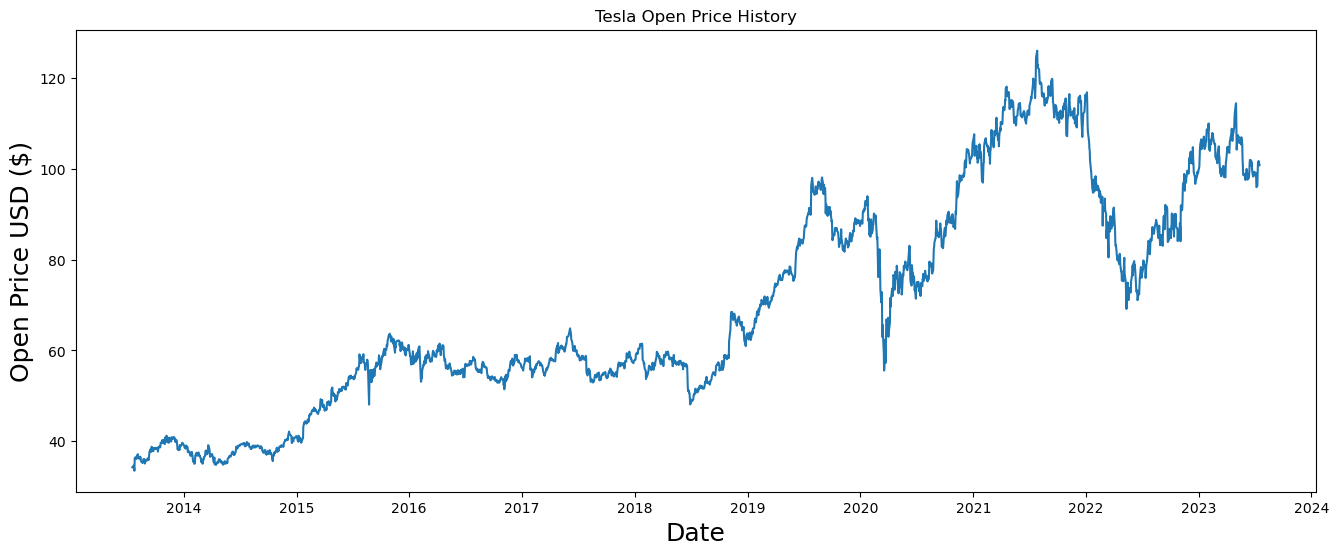

In [59]:
# Plotting the close price history
plt.figure(figsize=(16,6))
plt.title('Tesla Open Price History')
plt.plot(sbux_data['Date'], sbux_data['Open'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price USD ($)', fontsize=18)
plt.show()

In [60]:
sbux_data.isna().any()

Company       False
Date          False
Close/Last    False
Volume        False
Open          False
High          False
Low           False
dtype: bool

In [61]:
sbux_data.tail(10)

,Company,Date,Close/Last,Volume,Open,High,Low
2525,SBUX,2023-07-03,99.15,3281097,98.73,99.5700,98.245
2524,SBUX,2023-07-05,98.46,6366733,99.15,99.3300,98.290
2523,SBUX,2023-07-06,96.20,7156959,97.86,98.0700,95.905
2522,SBUX,2023-07-07,96.05,7889474,95.99,96.6600,95.550
2521,SBUX,2023-07-10,99.13,9294603,96.30,99.5300,96.230
2520,SBUX,2023-07-11,100.09,5271726,99.44,100.2300,99.140
2519,SBUX,2023-07-12,101.14,6971946,101.42,101.8300,100.760
2518,SBUX,2023-07-13,101.60,4511661,101.51,102.1999,101.300
2517,SBUX,2023-07-14,101.61,3939769,101.77,102.0800,100.985
2516,SBUX,2023-07-17,100.93,5246462,100.83,101.8100,100.040


In [62]:
sbux_data.describe()

,Close/Last,Volume,Open,High,Low
count,2516.000000,2.516000e+03,2516.000000,2516.000000,2516.000000
mean,69.964221,8.768385e+06,69.949854,70.596494,69.291631
std,23.795273,4.554146e+06,23.784569,24.021144,23.551886
min,33.305000,1.847770e+06,33.470000,34.150000,33.150000
25%,54.308750,6.021590e+06,54.255000,54.697500,53.875000
50%,60.575000,7.706898e+06,60.650000,61.080000,60.040000
75%,88.397500,1.014720e+07,88.170000,89.102500,87.487500
max,126.060000,6.201360e+07,126.080000,126.320000,124.810000


In [63]:
sbux_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516 entries, 5031 to 2516
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Company     2516 non-null   object        
 1   Date        2516 non-null   datetime64[ns]
 2   Close/Last  2516 non-null   float64       
 3   Volume      2516 non-null   int64         
 4   Open        2516 non-null   float64       
 5   High        2516 non-null   float64       
 6   Low         2516 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 157.2+ KB


In [64]:
sbux_data.isnull().sum()

Company       0
Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [65]:
# Split training and testing datasets

df_test = sbux_data.tail(40)
sbux_df = sbux_data.iloc[::-1]

In [66]:
sbux_df['Open'].mean()

69.94985369634342

c:\Users\Kha Nguyen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Kha Nguyen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Kha Nguyen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

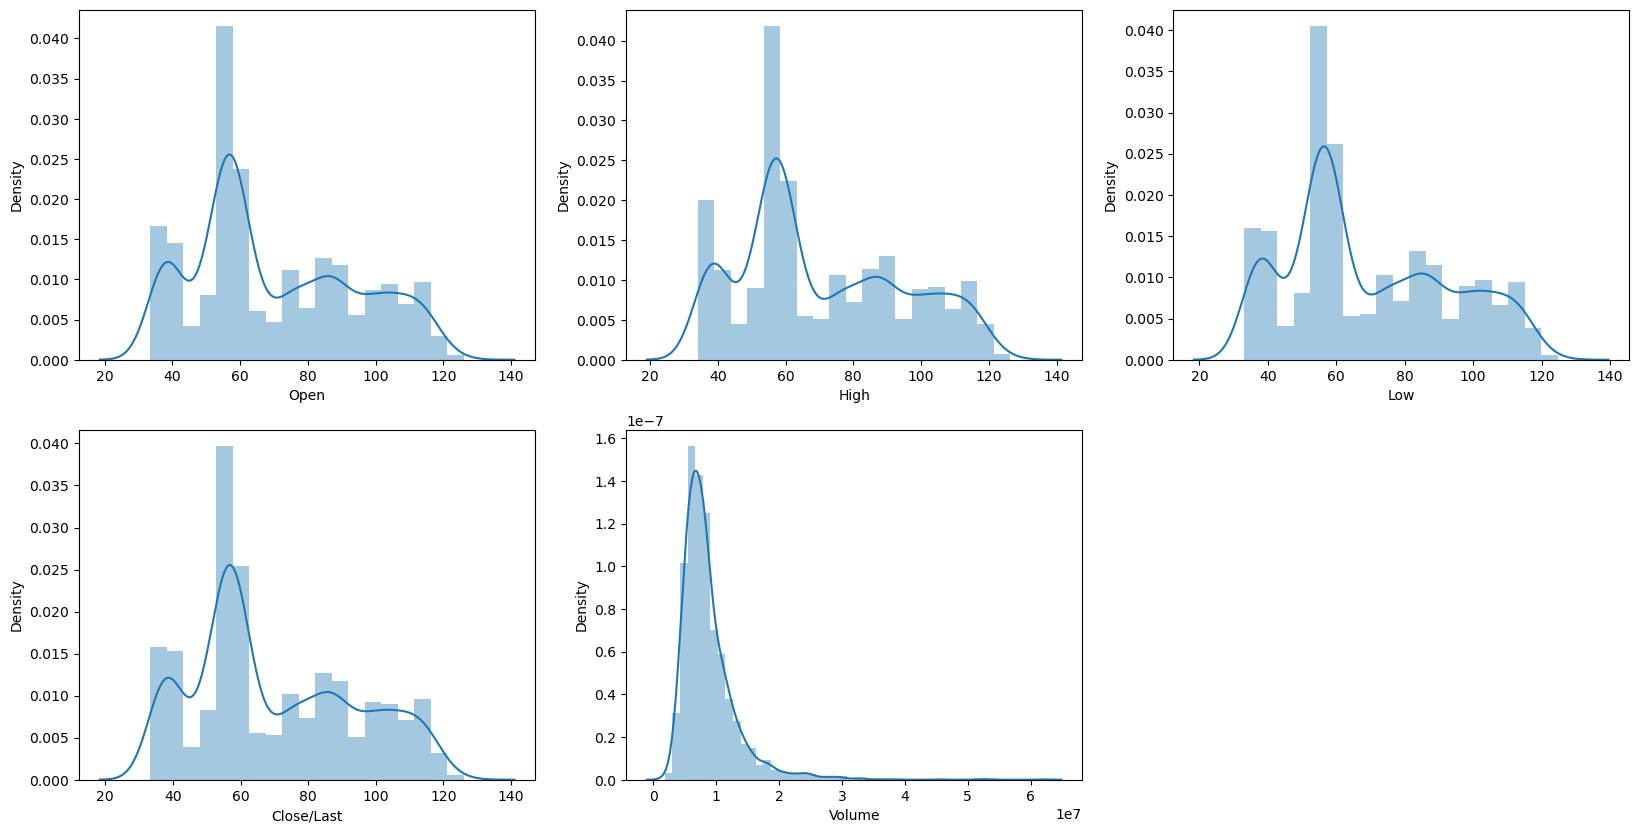

In [67]:
import seaborn as sb
features = ['Open', 'High', 'Low', 'Close/Last', 'Volume']
 
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(sbux_data[col])
plt.show()

In [68]:
sbux_data.describe()

,Close/Last,Volume,Open,High,Low
count,2516.000000,2.516000e+03,2516.000000,2516.000000,2516.000000
mean,69.964221,8.768385e+06,69.949854,70.596494,69.291631
std,23.795273,4.554146e+06,23.784569,24.021144,23.551886
min,33.305000,1.847770e+06,33.470000,34.150000,33.150000
25%,54.308750,6.021590e+06,54.255000,54.697500,53.875000
50%,60.575000,7.706898e+06,60.650000,61.080000,60.040000
75%,88.397500,1.014720e+07,88.170000,89.102500,87.487500
max,126.060000,6.201360e+07,126.080000,126.320000,124.810000


In [69]:
sbux_data

,Company,Date,Close/Last,Volume,Open,High,Low
5031,SBUX,2013-07-18,34.240,8536008,34.225,34.5050,34.020
5030,SBUX,2013-07-19,34.395,7196954,34.285,34.5550,34.200
5029,SBUX,2013-07-22,34.510,6559682,34.540,34.6050,34.275
5028,SBUX,2013-07-23,33.830,8465132,34.620,34.6600,33.725
5027,SBUX,2013-07-24,33.305,14028714,34.060,34.2150,33.150
...,...,...,...,...,...,...,...
2520,SBUX,2023-07-11,100.090,5271726,99.440,100.2300,99.140
2519,SBUX,2023-07-12,101.140,6971946,101.420,101.8300,100.760
2518,SBUX,2023-07-13,101.600,4511661,101.510,102.1999,101.300
2517,SBUX,2023-07-14,101.610,3939769,101.770,102.0800,100.985


c:\Users\Kha Nguyen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Kha Nguyen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Kha Nguyen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Kha Ngu

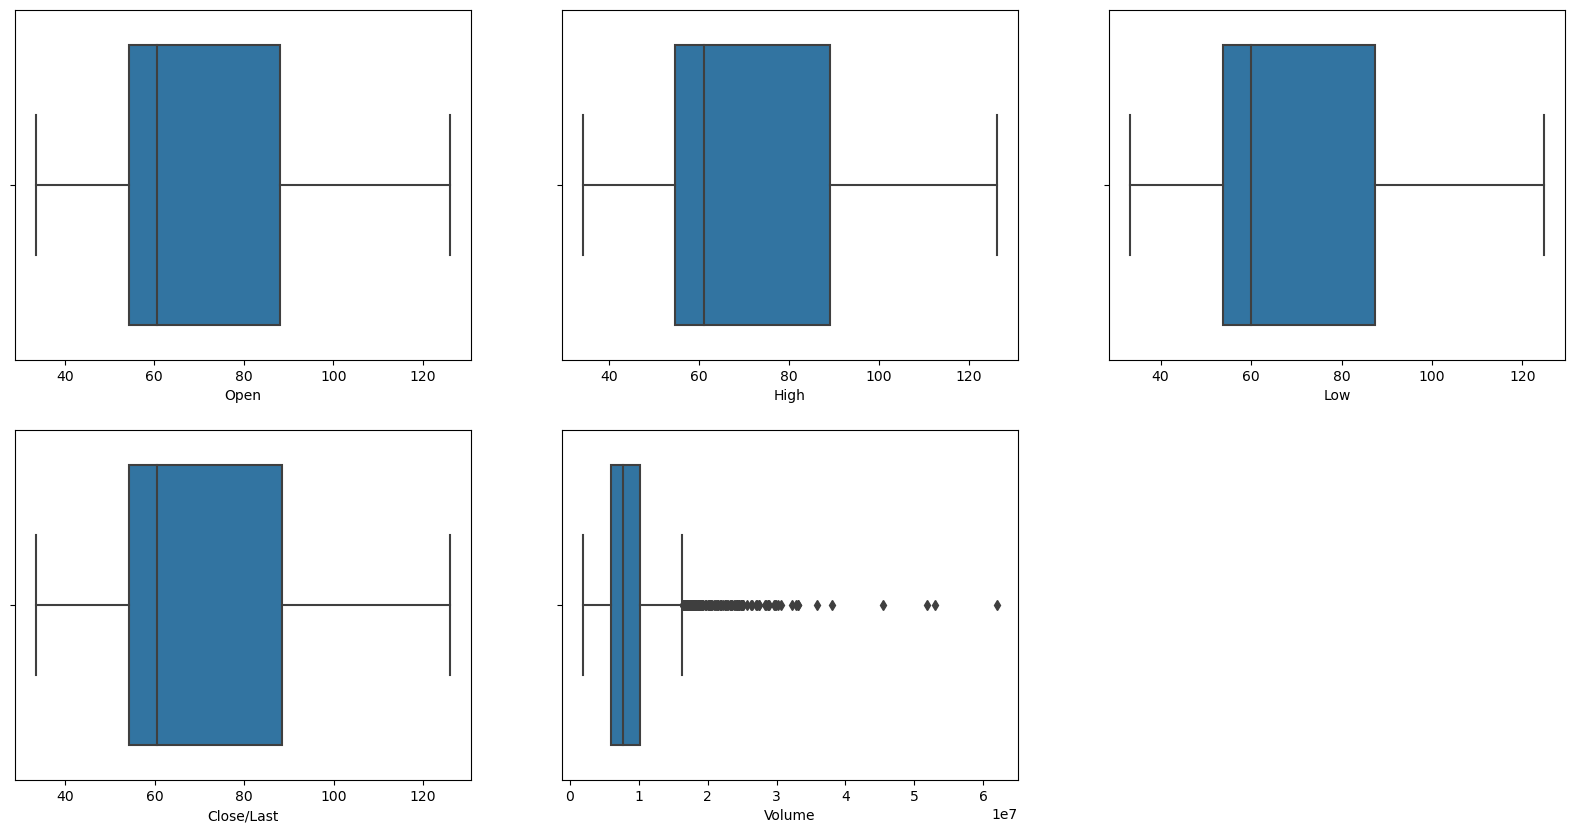

In [70]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(sbux_data[col])
plt.show()

In [71]:
sbux_data["Date"] = sbux_data["Date"].astype(str) 
splitted = sbux_data['Date'].str.split('-', expand=True)
 
sbux_data['day'] = splitted[2].astype('int')
sbux_data['month'] = splitted[1].astype('int')
sbux_data['year'] = splitted[0].astype('int')
 
sbux_data.head()

,Company,Date,Close/Last,Volume,Open,High,Low,day,month,year
5031,SBUX,2013-07-18,34.240,8536008,34.225,34.505,34.020,18,7,2013
5030,SBUX,2013-07-19,34.395,7196954,34.285,34.555,34.200,19,7,2013
5029,SBUX,2013-07-22,34.510,6559682,34.540,34.605,34.275,22,7,2013
5028,SBUX,2013-07-23,33.830,8465132,34.620,34.660,33.725,23,7,2013
5027,SBUX,2013-07-24,33.305,14028714,34.060,34.215,33.150,24,7,2013


In [72]:
sbux_data.tail(5)

,Company,Date,Close/Last,Volume,Open,High,Low,day,month,year
2520,SBUX,2023-07-11,100.09,5271726,99.44,100.2300,99.140,11,7,2023
2519,SBUX,2023-07-12,101.14,6971946,101.42,101.8300,100.760,12,7,2023
2518,SBUX,2023-07-13,101.60,4511661,101.51,102.1999,101.300,13,7,2023
2517,SBUX,2023-07-14,101.61,3939769,101.77,102.0800,100.985,14,7,2023
2516,SBUX,2023-07-17,100.93,5246462,100.83,101.8100,100.040,17,7,2023


In [73]:
sbux_data.isnull().sum()

Company       0
Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
day           0
month         0
year          0
dtype: int64

In [74]:
sbux_data['is_quarter_end'] = np.where(sbux_data['month']%3==0,1,0)
sbux_data.head()

,Company,Date,Close/Last,Volume,Open,High,Low,day,month,year,is_quarter_end
5031,SBUX,2013-07-18,34.240,8536008,34.225,34.505,34.020,18,7,2013,0
5030,SBUX,2013-07-19,34.395,7196954,34.285,34.555,34.200,19,7,2013,0
5029,SBUX,2013-07-22,34.510,6559682,34.540,34.605,34.275,22,7,2013,0
5028,SBUX,2013-07-23,33.830,8465132,34.620,34.660,33.725,23,7,2013,0
5027,SBUX,2013-07-24,33.305,14028714,34.060,34.215,33.150,24,7,2013,0


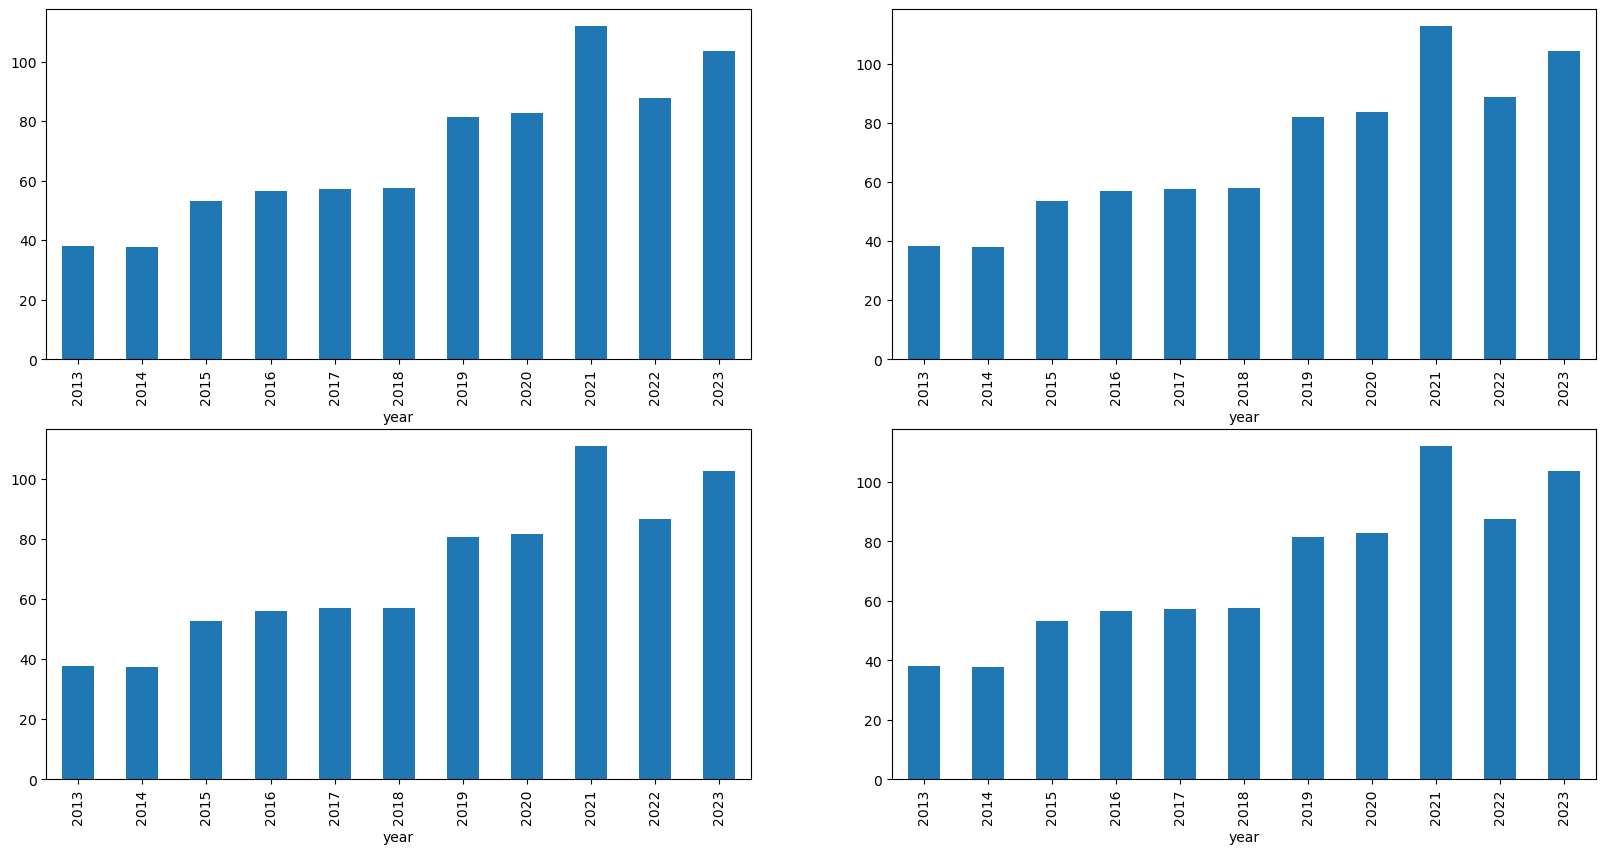

In [75]:
data_grouped = sbux_data.groupby('year').mean()
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(['Open', 'High', 'Low', 'Close/Last']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [76]:
sbux_data.groupby('is_quarter_end').mean()

,Close/Last,Volume,Open,High,Low,day,month,year
is_quarter_end,,,,,,,,
0,69.790100,8.783478e+06,69.762833,70.398415,69.125384,15.730931,6.096697,2018.040841
1,70.304891,8.738856e+06,70.315763,70.984040,69.616897,15.772033,7.431257,2018.024677


In [77]:
sbux_data['open-close']  = sbux_data['Open'] - sbux_data['Close/Last']
sbux_data['low-high']  = sbux_data['Low'] - sbux_data['High']
sbux_data['target'] = np.where(sbux_data['Close/Last'].shift(-1) > sbux_data['Close/Last'], 1, 0)


In [78]:
plt.figure(figsize=(10, 10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

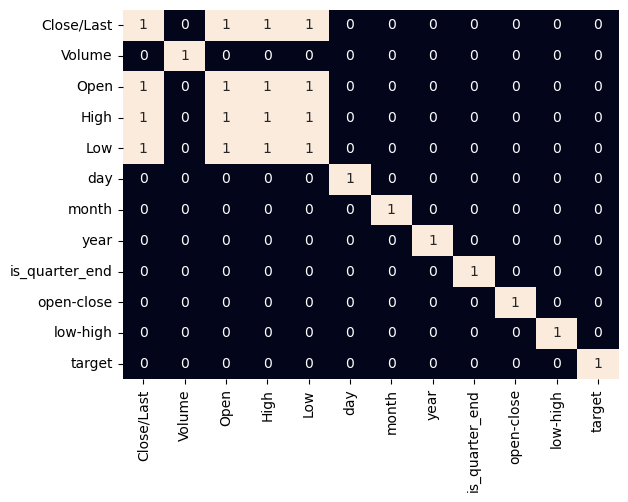

In [79]:
# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(sbux_data.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
features = sbux_data[['open-close', 'low-high', 'is_quarter_end']]
target = sbux_data['target']
 
scaler = StandardScaler()
features = scaler.fit_transform(features)
 
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(2264, 3) (252, 3)


In [81]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.svm import SVC

In [82]:
models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier()]
 
for i in range(3):
  models[i].fit(X_train, Y_train)
 
  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5178261348430986
Validation Accuracy :  0.4579107505070994

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.5282666991616147
Validation Accuracy :  0.42450557809330625

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training

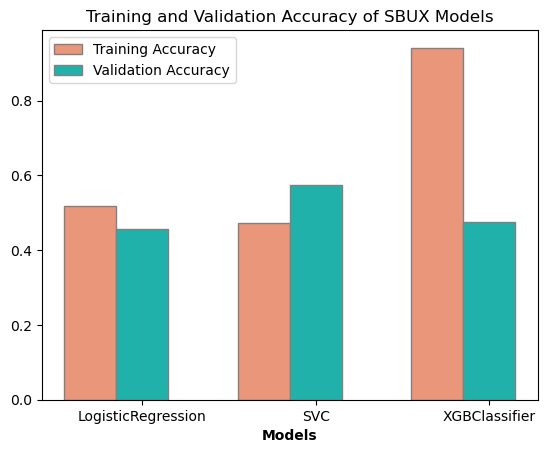

In [83]:
# Model names
models_name = ['LogisticRegression', 'SVC', 'XGBClassifier']

# Training accuracy values
train_acc = [0.5178261348430986, 0.47173369140266486, 0.9417317151474108]

# Validation accuracy values
val_acc = [0.4579107505070994, 0.5754944219066938, 0.4757543103448276]

# Bar width
barWidth = 0.3

# Set position of bar on X axis
r1 = np.arange(len(train_acc))
r2 = [x + barWidth for x in r1]

# Create blue bars for training accuracy
plt.bar(r1, train_acc, color='darksalmon', width=barWidth, edgecolor='grey', label='Training Accuracy')

# Create red bars for validation accuracy
plt.bar(r2, val_acc, color='lightseagreen', width=barWidth, edgecolor='grey', label='Validation Accuracy')

# Title & Subtitle
plt.title('Training and Validation Accuracy of SBUX Models')
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(train_acc))], models_name)

plt.savefig('SBUX_plot.png')

# Create legend & Show graphic
plt.legend()
plt.show()